In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\KIIT\Downloads\peakflo.csv")

In [3]:
df.head()

,id,total_amount,amount_due,issue_date,due_date,paid_on_date,payer_id
0,1,1720329,0.0,2021-11-01 00:00:00.000000 UTC,2021-12-31 00:00:00.000000 UTC,2022-08-22 00:00:00.000000 UTC,pKey9MQ59wyF6GhjWM5p
1,2,1560727,0.0,2021-11-01 00:00:00.000000 UTC,2021-12-01 00:00:00.000000 UTC,2021-12-04 00:00:00.000000 UTC,Ed9wuAC3RlOfWkENchdD
2,3,149600,0.0,2021-11-01 00:00:00.000000 UTC,2022-02-14 00:00:00.000000 UTC,2022-02-22 00:00:00.000000 UTC,bPBZIvFiIE1ZbZjvuYm7
3,4,149600,0.0,2021-11-01 00:00:00.000000 UTC,2022-02-14 00:00:00.000000 UTC,2022-02-22 00:00:00.000000 UTC,bPBZIvFiIE1ZbZjvuYm7
4,5,149600,0.0,2021-11-01 00:00:00.000000 UTC,2022-02-14 00:00:00.000000 UTC,2022-02-22 00:00:00.000000 UTC,bPBZIvFiIE1ZbZjvuYm7


In [4]:
df.isnull().sum()

id                 0
total_amount       0
amount_due         0
issue_date         0
due_date           0
paid_on_date    4763
payer_id           0
dtype: int64

In [5]:
df.shape

(17692, 7)

In [6]:
df.describe()

,id,total_amount,amount_due
count,17692.000000,1.769200e+04,1.769200e+04
mean,8846.500000,3.593852e+05,1.165280e+05
std,5107.384817,6.711405e+05,4.492811e+05
min,1.000000,2.800000e+01,0.000000e+00
25%,4423.750000,4.021300e+04,0.000000e+00
50%,8846.500000,9.837550e+04,0.000000e+00
75%,13269.250000,2.675588e+05,2.100000e+04
max,17692.000000,1.407881e+07,1.246271e+07


Checking for Invalid rows :  total_amount < due_amount, issue_date > due_date, paid_on_date < issue_date

In [7]:
df[(df['total_amount'] < df['amount_due']) & (df['amount_due'] != 0)]

,id,total_amount,amount_due,issue_date,due_date,paid_on_date,payer_id
38,39,91800,108000.0,2021-11-08 00:00:00.000000 UTC,2022-01-07 00:00:00.000000 UTC,NaN,aWswOgJZxKq3KTnhxx3F
55,56,521107,613067.0,2021-11-08 00:00:00.000000 UTC,2021-11-23 00:00:00.000000 UTC,NaN,SRyNwRSbaPRzxiSBF0nQ
56,57,120233,141450.0,2021-11-08 00:00:00.000000 UTC,2021-11-23 00:00:00.000000 UTC,NaN,SRyNwRSbaPRzxiSBF0nQ
57,58,100912,118720.0,2021-11-08 00:00:00.000000 UTC,2021-11-23 00:00:00.000000 UTC,NaN,SRyNwRSbaPRzxiSBF0nQ
70,71,40213,47309.0,2021-11-10 00:00:00.000000 UTC,2021-12-25 00:00:00.000000 UTC,NaN,6rdvAbZOn44Y76vIqPfd
...,...,...,...,...,...,...,...
17682,17683,313477,368796.0,2022-10-31 00:00:00.000000 UTC,2023-01-29 00:00:00.000000 UTC,NaN,LuHlLAXT39tTSzUZqtA9
17683,17684,71273,83851.0,2022-10-31 00:00:00.000000 UTC,2022-12-30 00:00:00.000000 UTC,NaN,Cdi1XUsXJcXa3th2cuA8
17684,17685,109201,128472.0,2022-10-31 00:00:00.000000 UTC,2023-01-29 00:00:00.000000 UTC,NaN,LuHlLAXT39tTSzUZqtA9
17685,17686,255281,300330.0,2022-10-31 00:00:00.000000 UTC,2022-12-15 00:00:00.000000 UTC,NaN,THYPtPgHhFm2owskJpAq


In [8]:
df.drop(df[(df['total_amount'] < df['amount_due']) & (df['amount_due'] != 0)].index, inplace=True)

In [9]:
df['issue_date'] = pd.to_datetime(df['issue_date']).dt.strftime('%Y-%m-%d')
df['due_date'] = pd.to_datetime(df['due_date']).dt.strftime('%Y-%m-%d')
df['paid_on_date'] = pd.to_datetime(df['paid_on_date']).dt.strftime('%Y-%m-%d')

In [10]:
df[df['issue_date'] > df['due_date']]

,id,total_amount,amount_due,issue_date,due_date,paid_on_date,payer_id


In [11]:
df[df['paid_on_date'] < df['issue_date']]

,id,total_amount,amount_due,issue_date,due_date,paid_on_date,payer_id
5977,5978,51510,0.0,2022-02-28,2022-02-28,2022-02-17,dxCTGQrx5lSQFvzc4106
8113,8114,2257265,0.0,2022-04-07,2022-04-07,2022-03-31,JpduT7UYzXhuzAKpDFtM
8114,8115,2232611,0.0,2022-04-07,2022-04-07,2022-03-31,JpduT7UYzXhuzAKpDFtM
8115,8116,2197669,0.0,2022-04-07,2022-04-07,2022-03-31,JpduT7UYzXhuzAKpDFtM
8150,8151,2214063,0.0,2022-04-08,2022-04-08,2022-03-31,JpduT7UYzXhuzAKpDFtM
8555,8556,1962105,0.0,2022-04-18,2022-04-18,2022-04-16,JpduT7UYzXhuzAKpDFtM
8556,8557,59626,0.0,2022-04-18,2022-04-18,2022-04-16,JpduT7UYzXhuzAKpDFtM
9073,9074,2207426,0.0,2022-04-29,2022-04-29,2022-04-16,JpduT7UYzXhuzAKpDFtM
9472,9473,2176505,0.0,2022-05-04,2022-05-04,2022-04-26,W7RV5xv0lH3oB4GJY20C
9489,9490,2224663,0.0,2022-05-05,2022-05-05,2022-04-26,W7RV5xv0lH3oB4GJY20C


In [12]:
df.shape

(13133, 7)

In [13]:
df.drop(df[df['paid_on_date'] < df['issue_date']].index, inplace=True)

In [14]:
df.shape

(13105, 7)

In [15]:
df['paid_on_date'] = pd.to_datetime(df['paid_on_date'])
df['issue_date'] = pd.to_datetime(df['issue_date'])
df['issue_month'] = df['issue_date'].dt.month
df['paid_month'] = df['paid_on_date'].dt.month

In [16]:
df.head()

,id,total_amount,amount_due,issue_date,due_date,paid_on_date,payer_id,issue_month,paid_month
0,1,1720329,0.0,2021-11-01,2021-12-31,2022-08-22,pKey9MQ59wyF6GhjWM5p,11,8.0
1,2,1560727,0.0,2021-11-01,2021-12-01,2021-12-04,Ed9wuAC3RlOfWkENchdD,11,12.0
2,3,149600,0.0,2021-11-01,2022-02-14,2022-02-22,bPBZIvFiIE1ZbZjvuYm7,11,2.0
3,4,149600,0.0,2021-11-01,2022-02-14,2022-02-22,bPBZIvFiIE1ZbZjvuYm7,11,2.0
4,5,149600,0.0,2021-11-01,2022-02-14,2022-02-22,bPBZIvFiIE1ZbZjvuYm7,11,2.0


In [17]:
df['issue_date'] = pd.to_datetime(df['issue_date'])
df['due_date'] = pd.to_datetime(df['due_date'])
df['paid_on_date'] = pd.to_datetime(df['paid_on_date'])

df['paid_in'] = np.where((df['paid_on_date'] >= df['issue_date']) & (df['paid_on_date'] <= df['due_date']),
                         (df['paid_on_date'] - df['issue_date']).dt.days, 0)

df['delay days'] = np.where(df['paid_on_date'] > df['due_date'],
                            (df['paid_on_date'] - df['due_date']).dt.days, 0)



#Finding the paid_month, paid_in how many days, and total delay_days

In [18]:
df.head()

,id,total_amount,amount_due,issue_date,due_date,paid_on_date,payer_id,issue_month,paid_month,paid_in,delay days
0,1,1720329,0.0,2021-11-01,2021-12-31,2022-08-22,pKey9MQ59wyF6GhjWM5p,11,8.0,0.0,234.0
1,2,1560727,0.0,2021-11-01,2021-12-01,2021-12-04,Ed9wuAC3RlOfWkENchdD,11,12.0,0.0,3.0
2,3,149600,0.0,2021-11-01,2022-02-14,2022-02-22,bPBZIvFiIE1ZbZjvuYm7,11,2.0,0.0,8.0
3,4,149600,0.0,2021-11-01,2022-02-14,2022-02-22,bPBZIvFiIE1ZbZjvuYm7,11,2.0,0.0,8.0
4,5,149600,0.0,2021-11-01,2022-02-14,2022-02-22,bPBZIvFiIE1ZbZjvuYm7,11,2.0,0.0,8.0


In [19]:
df.loc[df['amount_due'] != 0, 'delay days'] = np.inf

In [20]:
df.columns

Index(['id', 'total_amount', 'amount_due', 'issue_date', 'due_date',
       'paid_on_date', 'payer_id', 'issue_month', 'paid_month', 'paid_in',
       'delay days'],
      dtype='object')

In [21]:
con = [
    (df['delay days'] == 0),
    (df['delay days'] > 0) & (df['delay days'] <= 7),
    (df['delay days'] > 7) & (df['delay days'] <= 15),
    (df['delay days'] > 15) & (df['delay days'] <= 30),
    (df['delay days'] > 30) & (df['delay days'] <= 60),
    (df['delay days'] > 60),
    (df['delay days'] == np.inf)
]

#creating buckets for every payer category

categories = ['On-time Payers', '1-7', '8-15', '15-30', '30-60', '60+', 'Yet to Pay']
df['payer_category'] = pd.cut(df['delay days'], bins=[-1, 0, 7, 15, 30, 60, 1000, float('inf')], labels=categories)

In [22]:
df['payer_category'].value_counts()

60+               3376
30-60             3016
On-time Payers    2228
15-30             1755
1-7               1446
8-15              1080
Yet to Pay         204
Name: payer_category, dtype: int64

In [23]:
# df[(df['paid_in']==0) & (df['delay days']==0)]

In [24]:
df.head()

,id,total_amount,amount_due,issue_date,due_date,paid_on_date,payer_id,issue_month,paid_month,paid_in,delay days,payer_category
0,1,1720329,0.0,2021-11-01,2021-12-31,2022-08-22,pKey9MQ59wyF6GhjWM5p,11,8.0,0.0,234.0,60+
1,2,1560727,0.0,2021-11-01,2021-12-01,2021-12-04,Ed9wuAC3RlOfWkENchdD,11,12.0,0.0,3.0,1-7
2,3,149600,0.0,2021-11-01,2022-02-14,2022-02-22,bPBZIvFiIE1ZbZjvuYm7,11,2.0,0.0,8.0,8-15
3,4,149600,0.0,2021-11-01,2022-02-14,2022-02-22,bPBZIvFiIE1ZbZjvuYm7,11,2.0,0.0,8.0,8-15
4,5,149600,0.0,2021-11-01,2022-02-14,2022-02-22,bPBZIvFiIE1ZbZjvuYm7,11,2.0,0.0,8.0,8-15


In [25]:
df.payer_id.nunique()

594

In [26]:
df.payer_id.value_counts()

pKey9MQ59wyF6GhjWM5p    3621
bp1evZYjwarCVSaPPUin     790
gamjAwI3VnxuEuLD7mwT     352
nELQW5vJOSBCgiwHissH     296
lujY0rUNVzvx80az3nKf     227
                        ... 
OV2y2RbYygijYB0GHMAH       1
17tbdeXoDQKMqc4xOXya       1
wr2hZ3hNepenF3lo27M5       1
SZWgGWpqZEIdJEA1oCB1       1
PClsJe3z5vjqgjmu9LmR       1
Name: payer_id, Length: 594, dtype: int64

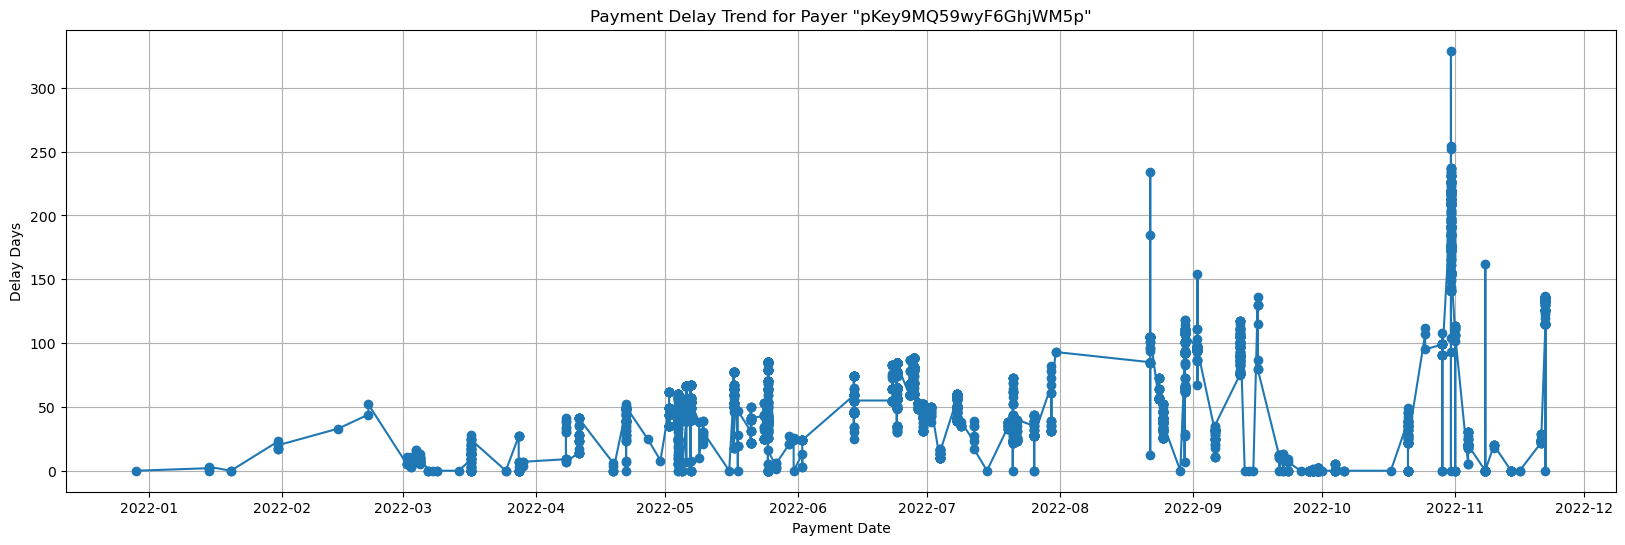

In [27]:
def avg_delay_by_id(df, payer_id):
    pot = df[df['payer_id'] == payer_id]
    pot = pot.sort_values(by='paid_on_date')

    plt.figure(figsize=(20, 6))
    plt.plot(pot['paid_on_date'], pot['delay days'], marker='o', linestyle='-')
    plt.title(f'Payment Delay Trend for Payer "{payer_id}"')
    plt.xlabel('Payment Date')
    plt.ylabel('Delay Days')
    plt.grid(True)
    plt.show()

avg_delay_by_id(df, 'pKey9MQ59wyF6GhjWM5p')

#avg delay by payer_id

In [28]:
df.describe()

,id,total_amount,amount_due,issue_month,paid_month,paid_in,delay days
count,13105.000000,1.310500e+04,1.310500e+04,13105.000000,12901.000000,13105.000000,13105.0
mean,7374.705151,3.535495e+05,4.334097e+03,5.245174,6.599643,6.304235,inf
std,4597.255636,6.690664e+05,7.156966e+04,3.587933,2.844213,16.472935,NaN
min,1.000000,2.800000e+01,0.000000e+00,1.000000,1.000000,0.000000,0.0
25%,3439.000000,3.943700e+04,0.000000e+00,2.000000,5.000000,0.000000,6.0
50%,6991.000000,8.571300e+04,0.000000e+00,4.000000,6.000000,0.000000,31.0
75%,11100.000000,2.550310e+05,0.000000e+00,8.000000,9.000000,0.000000,65.0
max,17692.000000,1.407881e+07,3.074076e+06,12.000000,12.000000,104.000000,inf


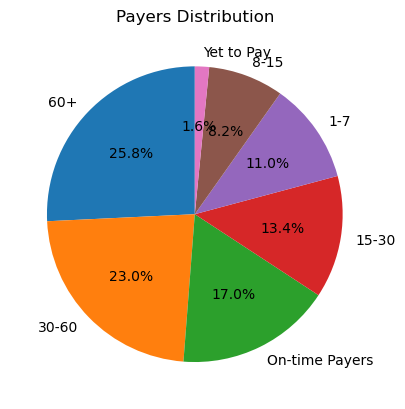

In [29]:
labels = df['payer_category'].value_counts().index
sizes = df['payer_category'].value_counts().values

plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title('Payers Distribution')
plt.show()


#distribution of all type of payers

In [30]:
df.columns

Index(['id', 'total_amount', 'amount_due', 'issue_date', 'due_date',
       'paid_on_date', 'payer_id', 'issue_month', 'paid_month', 'paid_in',
       'delay days', 'payer_category'],
      dtype='object')

In [31]:
# pd.set_option('display.float_format', '{:.1f}'.format)
df['total_amount'].describe()

count    1.310500e+04
mean     3.535495e+05
std      6.690664e+05
min      2.800000e+01
25%      3.943700e+04
50%      8.571300e+04
75%      2.550310e+05
max      1.407881e+07
Name: total_amount, dtype: float64

In [32]:
df['delay days'].describe()

count    13105.0
mean         inf
std          NaN
min          0.0
25%          6.0
50%         31.0
75%         65.0
max          inf
Name: delay days, dtype: float64

In [33]:
def reminder(row):
    payer_id = row['payer_id']
    avg_delay_days = df[df['payer_id'] == payer_id]['delay days'].mean()

    if row['total_amount'] > df['total_amount'].quantile(0.75):
        return 'Frequent'
    if avg_delay_days >= 60:
        return 'Frequent'
    if row['total_amount'] > 50000 and avg_delay_days > 30:
        return 'Moderate'
    else:
        return 'Low'

df['reminders'] = df.apply(reminder, axis=1)

#creating conditions on type of reminders, how frequent we need to remind them

In [34]:
df.head()

,id,total_amount,amount_due,issue_date,due_date,paid_on_date,payer_id,issue_month,paid_month,paid_in,delay days,payer_category,reminders
0,1,1720329,0.0,2021-11-01,2021-12-31,2022-08-22,pKey9MQ59wyF6GhjWM5p,11,8.0,0.0,234.0,60+,Frequent
1,2,1560727,0.0,2021-11-01,2021-12-01,2021-12-04,Ed9wuAC3RlOfWkENchdD,11,12.0,0.0,3.0,1-7,Frequent
2,3,149600,0.0,2021-11-01,2022-02-14,2022-02-22,bPBZIvFiIE1ZbZjvuYm7,11,2.0,0.0,8.0,8-15,Frequent
3,4,149600,0.0,2021-11-01,2022-02-14,2022-02-22,bPBZIvFiIE1ZbZjvuYm7,11,2.0,0.0,8.0,8-15,Frequent
4,5,149600,0.0,2021-11-01,2022-02-14,2022-02-22,bPBZIvFiIE1ZbZjvuYm7,11,2.0,0.0,8.0,8-15,Frequent


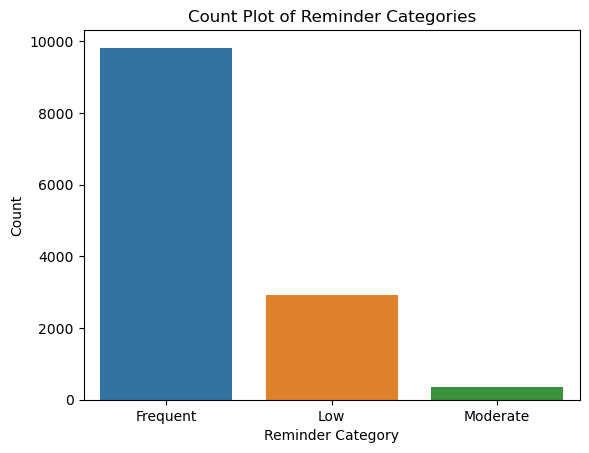

In [35]:
sns.countplot(x='reminders', data=df)
plt.xlabel('Reminder Category')
plt.ylabel('Count')
plt.title('Count Plot of Reminder Categories')
plt.show()

In [36]:
df.columns

Index(['id', 'total_amount', 'amount_due', 'issue_date', 'due_date',
       'paid_on_date', 'payer_id', 'issue_month', 'paid_month', 'paid_in',
       'delay days', 'payer_category', 'reminders'],
      dtype='object')

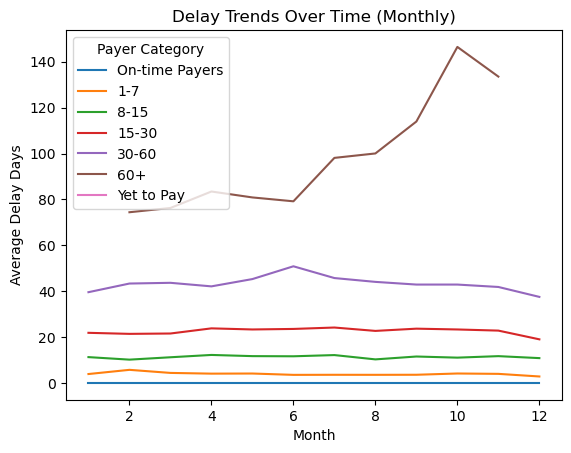

In [37]:
delay_trends_monthly = df.groupby(['paid_month', 'payer_category'])['delay days'].mean().unstack()
delay_trends_monthly.plot(kind='line', xlabel='Month', ylabel='Average Delay Days', title='Delay Trends Over Time (Monthly)')
plt.legend(title='Payer Category')
plt.show()

# Payers taking 60+ days to pay gradually increase the total delay days over coming months

In [38]:
df_copy=df

In [39]:
top_payers = df_copy.sort_values(by='total_amount', ascending=False)
top_payers.head(10)

,id,total_amount,amount_due,issue_date,due_date,paid_on_date,payer_id,issue_month,paid_month,paid_in,delay days,payer_category,reminders
2733,2734,14078812,0.0,2022-01-15,2022-03-16,2022-03-21,dYKpFF80TDjNifLt1nsx,1,3.0,0.0,5.0,1-7,Frequent
11748,11749,8416361,0.0,2022-06-27,2022-08-26,2022-09-06,pKey9MQ59wyF6GhjWM5p,6,9.0,0.0,11.0,8-15,Frequent
3216,3217,7144369,0.0,2022-01-25,2022-03-26,2022-10-31,pKey9MQ59wyF6GhjWM5p,1,10.0,0.0,219.0,60+,Frequent
9416,9417,7010149,0.0,2022-04-30,2022-05-30,2022-09-23,R5lEBrpb5UaVuhYbMaPZ,4,9.0,0.0,116.0,60+,Frequent
14146,14147,6751559,0.0,2022-08-29,2022-10-28,2022-08-29,pKey9MQ59wyF6GhjWM5p,8,8.0,0.0,0.0,On-time Payers,Frequent
8268,8269,6271754,0.0,2022-04-11,2022-06-10,2022-07-21,pKey9MQ59wyF6GhjWM5p,4,7.0,0.0,41.0,30-60,Frequent
9586,9587,5754972,0.0,2022-05-10,2022-07-09,2022-08-25,pKey9MQ59wyF6GhjWM5p,5,8.0,0.0,47.0,30-60,Frequent
11747,11748,5493979,0.0,2022-06-27,2022-08-26,2022-09-06,pKey9MQ59wyF6GhjWM5p,6,9.0,0.0,11.0,8-15,Frequent
4094,4095,5253220,0.0,2022-01-31,2022-04-01,2022-05-04,pKey9MQ59wyF6GhjWM5p,1,5.0,0.0,33.0,30-60,Frequent
5376,5377,5223474,0.0,2022-02-22,2022-02-22,2022-05-12,oHxKPSqufQC0RuKNbuou,2,5.0,0.0,79.0,60+,Frequent


In [40]:
top_payers.describe()

,id,total_amount,amount_due,issue_month,paid_month,paid_in,delay days
count,13105.000000,1.310500e+04,1.310500e+04,13105.000000,12901.000000,13105.000000,13105.0
mean,7374.705151,3.535495e+05,4.334097e+03,5.245174,6.599643,6.304235,inf
std,4597.255636,6.690664e+05,7.156966e+04,3.587933,2.844213,16.472935,NaN
min,1.000000,2.800000e+01,0.000000e+00,1.000000,1.000000,0.000000,0.0
25%,3439.000000,3.943700e+04,0.000000e+00,2.000000,5.000000,0.000000,6.0
50%,6991.000000,8.571300e+04,0.000000e+00,4.000000,6.000000,0.000000,31.0
75%,11100.000000,2.550310e+05,0.000000e+00,8.000000,9.000000,0.000000,65.0
max,17692.000000,1.407881e+07,3.074076e+06,12.000000,12.000000,104.000000,inf


In [41]:
#top payers, of all time, with avg delay per payment
payer_summary = df_copy.groupby('payer_id').agg({'total_amount': 'sum', 'delay days': 'mean'}).reset_index()
payer_summary = payer_summary.sort_values(by='total_amount', ascending=False)

In [42]:
payer_summary.head(10)

,payer_id,total_amount,delay days
487,pKey9MQ59wyF6GhjWM5p,1040978725,NaN
237,NAjIqWHdkYIerr4y239b,226480981,NaN
471,nELQW5vJOSBCgiwHissH,145638741,NaN
320,WfLk5Mql7UpNovIJPp6C,130706104,inf
566,xmKby8JBWyWXS3R1EAax,110740576,25.685185
419,huIXEhxBfSOq548jUIhM,104597950,83.800000
368,bp1evZYjwarCVSaPPUin,101695040,2.584810
161,FZBsxfxbzHyU23ZaNZVW,101470693,NaN
65,6JiVpSAze286QFXb9RXK,77045403,NaN
502,ryej13rMSEWlm68mjxF4,68048967,NaN


In [43]:
def top_payer(n, payer_summary):
    top_n_payers = payer_summary.head(n)
    fig, ax1 = plt.subplots(figsize=(15, 9))

    #total_amount
    bars = ax1.bar(top_n_payers['payer_id'], top_n_payers['total_amount'], color='green', alpha=0.7, label='Total Amount')

    #average delay days
    ax2 = ax1.twinx()
    ax2.plot(top_n_payers['payer_id'], top_n_payers['delay days'], color='red', marker='o', label='Average Delay Days')

    ax1.set_title(f'Top {n} Payers: Total Amount and Average Delay Days')
    ax1.set_xlabel('Payer ID')
    ax1.set_ylabel('Amount', color='green')
    ax2.set_ylabel('Delay Days', color='red')
    plt.show()
    
    
# top_payers pf all time with their avg delay

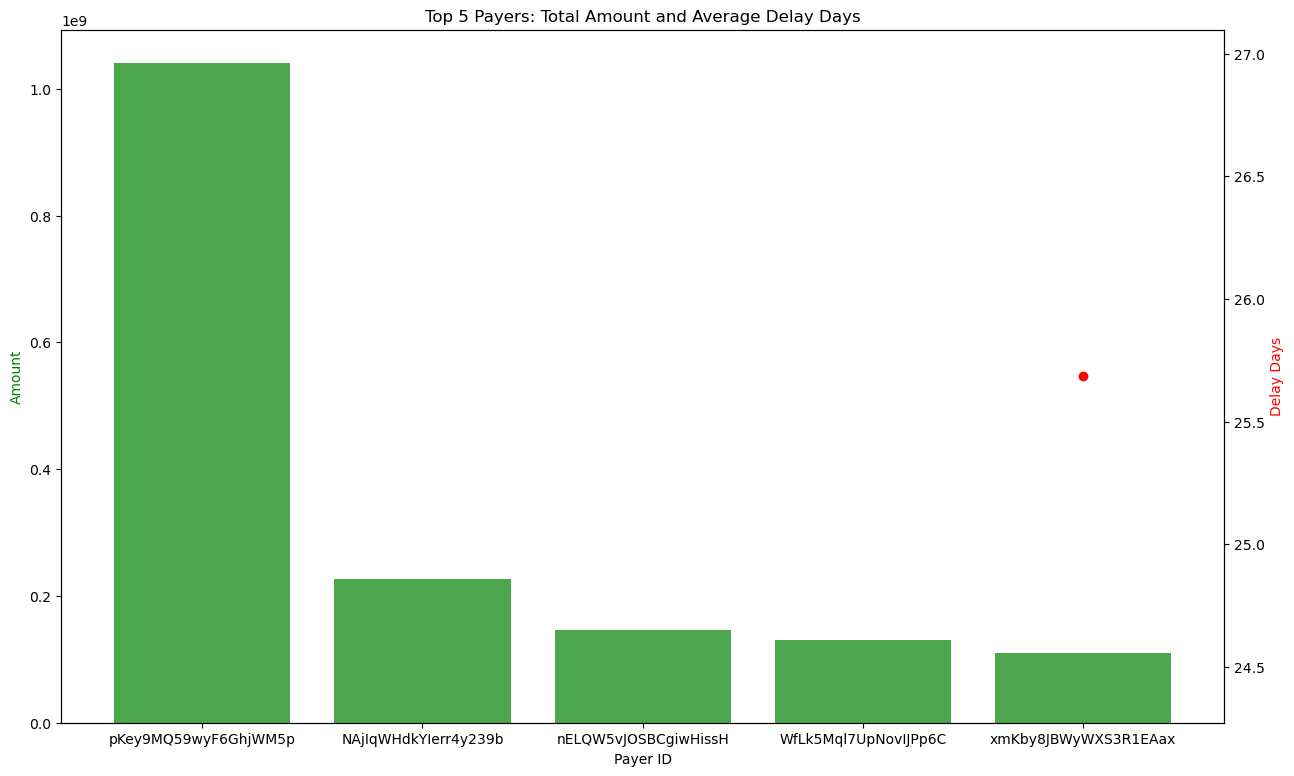

In [44]:
top_payer(5, payer_summary)

In [45]:
df.columns

Index(['id', 'total_amount', 'amount_due', 'issue_date', 'due_date',
       'paid_on_date', 'payer_id', 'issue_month', 'paid_month', 'paid_in',
       'delay days', 'payer_category', 'reminders'],
      dtype='object')

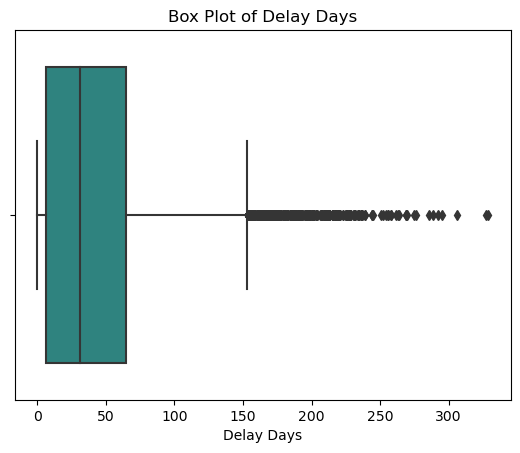

In [46]:
sns.boxplot(x='delay days', data=df, palette='viridis')
plt.title('Box Plot of Delay Days')
plt.xlabel('Delay Days')
plt.show()

In [47]:
unp=df_copy[df_copy['amount_due'] != 0]

In [48]:
(df_copy['amount_due'] != 0).sum()

204

In [49]:
(df_copy[df_copy['amount_due'] != 0]['payer_id']).value_counts()

C10LBuvfOEK3POvdTOTv    7
wFbrsfW3m848kZCfLHe5    6
1RJYjFZ4GwjUALEtG1Vu    6
pKey9MQ59wyF6GhjWM5p    6
6JiVpSAze286QFXb9RXK    5
                       ..
vkZrmSOt9aE2fPcphIZr    1
0LeTGafQ6aAwsqsSk7JQ    1
iH018mAualOKOokiq2Qu    1
K7109XtYrtiYv2RewDBi    1
NiKaIPB15ArvJcpFfEe1    1
Name: payer_id, Length: 155, dtype: int64

In [50]:
df.columns

Index(['id', 'total_amount', 'amount_due', 'issue_date', 'due_date',
       'paid_on_date', 'payer_id', 'issue_month', 'paid_month', 'paid_in',
       'delay days', 'payer_category', 'reminders'],
      dtype='object')

In [51]:
df.shape

(13105, 13)

In [52]:
def calculate_additional_metrics(df):
    # Calculating 'avg_delay' using groupby on 'payer_id' and 'delay days'
    df['avg_delay'] = df.replace([np.inf, -np.inf], np.nan).groupby('payer_id')['delay days'].transform('mean')

    # Calculating 'total_amount_paid_till_now' using groupby on 'payer_id' and 'total_amount'
    df['total_amount_paid_till_now'] = df.groupby('payer_id')['total_amount'].transform('sum')

    # Calculating 'total_payments_made' using groupby on 'payer_id'
    df['total_payments_made'] = df.groupby('payer_id')['id'].transform('count')  # Assuming 'id' is a unique identifier for payments

    return df

df = calculate_additional_metrics(df)

In [53]:
pd.set_option('display.float_format', '{:.4f}'.format)
df['due/total'] = df['amount_due'] / df['total_amount']

#due/total amount ratio

In [54]:
df.head()

,id,total_amount,amount_due,issue_date,due_date,paid_on_date,payer_id,issue_month,paid_month,paid_in,delay days,payer_category,reminders,avg_delay,total_amount_paid_till_now,total_payments_made,due/total
0,1,1720329,0.0000,2021-11-01,2021-12-31,2022-08-22,pKey9MQ59wyF6GhjWM5p,11,8.0000,0.0000,234.0000,60+,Frequent,60.1472,1040978725,3621,0.0000
1,2,1560727,0.0000,2021-11-01,2021-12-01,2021-12-04,Ed9wuAC3RlOfWkENchdD,11,12.0000,0.0000,3.0000,1-7,Frequent,13.2000,35419248,25,0.0000
2,3,149600,0.0000,2021-11-01,2022-02-14,2022-02-22,bPBZIvFiIE1ZbZjvuYm7,11,2.0000,0.0000,8.0000,8-15,Frequent,66.4038,31287954,208,0.0000
3,4,149600,0.0000,2021-11-01,2022-02-14,2022-02-22,bPBZIvFiIE1ZbZjvuYm7,11,2.0000,0.0000,8.0000,8-15,Frequent,66.4038,31287954,208,0.0000
4,5,149600,0.0000,2021-11-01,2022-02-14,2022-02-22,bPBZIvFiIE1ZbZjvuYm7,11,2.0000,0.0000,8.0000,8-15,Frequent,66.4038,31287954,208,0.0000


In [55]:
df.isnull().sum()

id                              0
total_amount                    0
amount_due                      0
issue_date                      0
due_date                        0
paid_on_date                  204
payer_id                        0
issue_month                     0
paid_month                    204
paid_in                         0
delay days                      0
payer_category                  0
reminders                       0
avg_delay                      19
total_amount_paid_till_now      0
total_payments_made             0
due/total                       0
dtype: int64

In [56]:
df['due/total'].describe()

count   13105.0000
mean        0.0059
std         0.0629
min         0.0000
25%         0.0000
50%         0.0000
75%         0.0000
max         0.9970
Name: due/total, dtype: float64

In [57]:
df[(df['amount_due']!=0)]

,id,total_amount,amount_due,issue_date,due_date,paid_on_date,payer_id,issue_month,paid_month,paid_in,delay days,payer_category,reminders,avg_delay,total_amount_paid_till_now,total_payments_made,due/total
122,123,1182649,314503.0000,2021-11-13,2022-01-12,NaT,uBoSyHLxAdZLG9lAy02n,11,NaN,0.0000,inf,Yet to Pay,Frequent,59.2000,6894777,6,0.2659
138,139,560954,813.0000,2021-11-15,2021-12-05,NaT,832BDvicdphTfmE4o51P,11,NaN,0.0000,inf,Yet to Pay,Frequent,23.8182,3418509,23,0.0014
150,151,101792,361.0000,2021-11-15,2022-01-14,NaT,lhF03L7I5kMc7bxLih1A,11,NaN,0.0000,inf,Yet to Pay,Frequent,96.9286,1031878,15,0.0035
333,334,583018,12587.1500,2021-11-15,2022-01-14,NaT,FZBsxfxbzHyU23ZaNZVW,11,NaN,0.0000,inf,Yet to Pay,Frequent,35.6349,101470693,64,0.0216
365,366,637957,1892.0000,2021-11-16,2021-12-04,NaT,KXSYXYCKNx3EZapHhhnv,11,NaN,0.0000,inf,Yet to Pay,Frequent,121.0000,1270075,2,0.0030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17166,17167,32232,12611.0000,2022-10-21,2022-11-20,NaT,8ODa2O9Ll6BRqaxcfheK,10,NaN,0.0000,inf,Yet to Pay,Frequent,26.6667,4078842,7,0.3913
17167,17168,279395,1410.0000,2022-10-22,2022-11-06,NaT,MffXiU4NLMMtTNlzP0gq,10,NaN,0.0000,inf,Yet to Pay,Frequent,0.0000,636238,3,0.0050
17303,17304,206040,7400.0000,2022-10-28,2022-11-12,NaT,jIyBZcByi9uwMVvkzif8,10,NaN,0.0000,inf,Yet to Pay,Frequent,NaN,206040,1,0.0359
17688,17689,377078,286372.0000,2022-10-31,2022-10-31,NaT,A3NQynMOlLGXICiXW86Q,10,NaN,0.0000,inf,Yet to Pay,Frequent,45.5714,2498423,8,0.7595


In [58]:
con0=(df['delay days']==0) | (df['avg_delay'] == 0) | (df['due/total']<0.4)
con1=(df['total_amount_paid_till_now'] <= 1000000) | (df['total_payments_made'] <= 3)
values = [0,1]
df['write_off'] = np.select([con0,con1], values, default=0)



#creating some conditions, High risk of write-off clients

In [59]:
df['total_amount_paid_till_now'].describe()

count        13105.0000
mean     312501254.4916
std      451931055.6855
min           9180.0000
25%        5104049.0000
50%       31287954.0000
75%     1040978725.0000
max     1040978725.0000
Name: total_amount_paid_till_now, dtype: float64

In [60]:
df[df['payer_id']=='FZBsxfxbzHyU23ZaNZVW']

,id,total_amount,amount_due,issue_date,due_date,paid_on_date,payer_id,issue_month,paid_month,paid_in,delay days,payer_category,reminders,avg_delay,total_amount_paid_till_now,total_payments_made,due/total,write_off
333,334,583018,12587.1500,2021-11-15,2022-01-14,NaT,FZBsxfxbzHyU23ZaNZVW,11,NaN,0.0000,inf,Yet to Pay,Frequent,35.6349,101470693,64,0.0216,0
561,562,453406,0.0000,2021-11-29,2022-01-13,2021-12-22,FZBsxfxbzHyU23ZaNZVW,11,12.0000,23.0000,0.0000,On-time Payers,Frequent,35.6349,101470693,64,0.0000,0
945,946,926014,0.0000,2021-12-09,2022-02-07,2022-02-01,FZBsxfxbzHyU23ZaNZVW,12,2.0000,54.0000,0.0000,On-time Payers,Frequent,35.6349,101470693,64,0.0000,0
946,947,886565,0.0000,2021-12-09,2022-02-07,2022-02-01,FZBsxfxbzHyU23ZaNZVW,12,2.0000,54.0000,0.0000,On-time Payers,Frequent,35.6349,101470693,64,0.0000,0
947,948,542581,0.0000,2021-12-09,2022-02-07,2022-02-01,FZBsxfxbzHyU23ZaNZVW,12,2.0000,54.0000,0.0000,On-time Payers,Frequent,35.6349,101470693,64,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8523,8524,2629240,0.0000,2022-04-18,2022-05-18,2022-09-30,FZBsxfxbzHyU23ZaNZVW,4,9.0000,0.0000,135.0000,60+,Frequent,35.6349,101470693,64,0.0000,0
8653,8654,2017739,0.0000,2022-04-20,2022-05-20,2022-09-30,FZBsxfxbzHyU23ZaNZVW,4,9.0000,0.0000,133.0000,60+,Frequent,35.6349,101470693,64,0.0000,0
8654,8655,2073402,0.0000,2022-04-20,2022-05-20,2022-09-30,FZBsxfxbzHyU23ZaNZVW,4,9.0000,0.0000,133.0000,60+,Frequent,35.6349,101470693,64,0.0000,0
14259,14260,52808,0.0000,2022-08-31,2022-10-15,2022-09-30,FZBsxfxbzHyU23ZaNZVW,8,9.0000,30.0000,0.0000,On-time Payers,Frequent,35.6349,101470693,64,0.0000,0


In [61]:
df.write_off.value_counts()


#27/13078 invoices can be wrote-off (most probably according to condition)

0    13078
1       27
Name: write_off, dtype: int64

In [62]:
df.columns

Index(['id', 'total_amount', 'amount_due', 'issue_date', 'due_date',
       'paid_on_date', 'payer_id', 'issue_month', 'paid_month', 'paid_in',
       'delay days', 'payer_category', 'reminders', 'avg_delay',
       'total_amount_paid_till_now', 'total_payments_made', 'due/total',
       'write_off'],
      dtype='object')

In [63]:
df[df.write_off==1]

,id,total_amount,amount_due,issue_date,due_date,paid_on_date,payer_id,issue_month,paid_month,paid_in,delay days,payer_category,reminders,avg_delay,total_amount_paid_till_now,total_payments_made,due/total,write_off
1469,1470,712623,538351.0000,2021-12-25,2022-02-23,NaT,SMjAddzGBeySKRFrCmZq,12,NaN,0.0000,inf,Yet to Pay,Frequent,NaN,712623,1,0.7554,1
3287,3288,285579,160639.0000,2022-01-27,2022-03-28,NaT,IP2ljn0Wq16adWee1R1z,1,NaN,0.0000,inf,Yet to Pay,Frequent,192.0000,386729,3,0.5625,1
3526,3527,40545,33650.0000,2022-01-29,2022-02-28,NaT,7UiAC3Htixjym7MXMQF5,1,NaN,0.0000,inf,Yet to Pay,Frequent,98.4545,700528,12,0.8299,1
4159,4160,143321,84962.0000,2022-01-31,2022-04-01,NaT,IyjuFpgJXfqECq1QrSpG,1,NaN,0.0000,inf,Yet to Pay,Frequent,60.5000,786476,11,0.5928,1
5258,5259,1938118,1580139.0000,2022-02-19,2022-04-05,NaT,zTGE6kZAHNyoSVAdVU7S,2,NaN,0.0000,inf,Yet to Pay,Frequent,22.0000,3234996,2,0.8153,1
5956,5957,72038,45523.0000,2022-02-28,2022-03-30,NaT,eCIXcu3XHB9lSXPdwV6N,2,NaN,0.0000,inf,Yet to Pay,Frequent,71.7500,948122,5,0.6319,1
6516,6517,200763,116994.0000,2022-03-10,2022-05-09,NaT,FZWs0cq6UUO1gEU1nZKU,3,NaN,0.0000,inf,Yet to Pay,Frequent,41.2500,475532,5,0.5827,1
6551,6552,1400519,647669.0000,2022-03-11,2022-04-10,NaT,naVoqThUNxK7DhNKur8s,3,NaN,0.0000,inf,Yet to Pay,Frequent,NaN,1400519,1,0.4624,1
7442,7443,366541,270925.0000,2022-03-29,2022-05-13,NaT,K7109XtYrtiYv2RewDBi,3,NaN,0.0000,inf,Yet to Pay,Frequent,140.5000,1464179,3,0.7391,1
8016,8017,4604482,3074076.2700,2022-04-03,2022-05-03,NaT,vkZrmSOt9aE2fPcphIZr,4,NaN,0.0000,inf,Yet to Pay,Frequent,NaN,4604482,1,0.6676,1


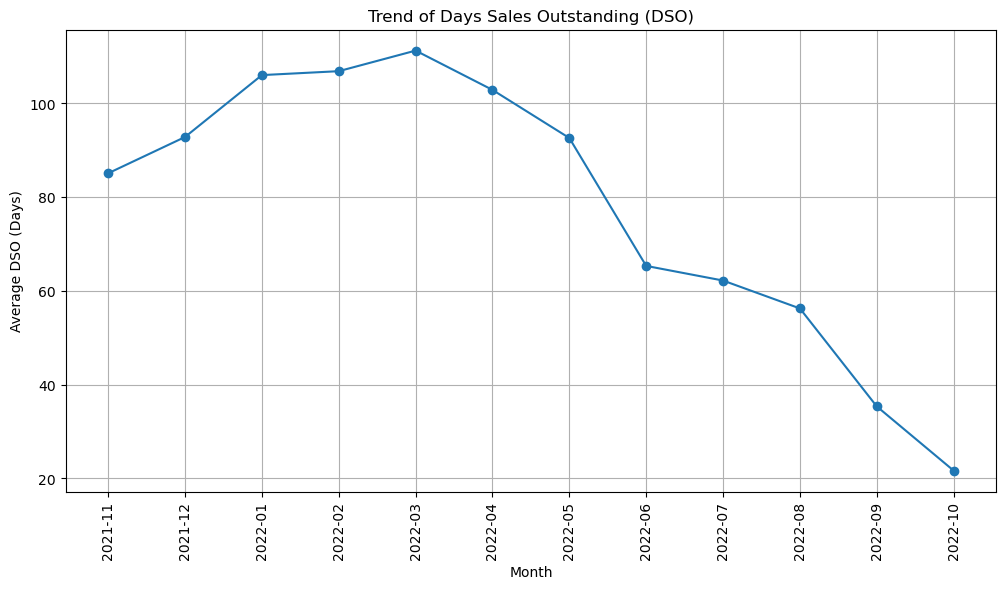

In [66]:
df['dso'] = (df['paid_on_date'] - df['issue_date']).dt.days

monthly_dso = df.groupby(df['issue_date'].dt.to_period("M"))['dso'].mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_dso.index.astype(str), monthly_dso.values, marker='o', linestyle='-')
plt.title('Trend of Days Sales Outstanding (DSO)')
plt.xlabel('Month')
plt.ylabel('Average DSO (Days)')
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()


#Down trend of avg DSO invoice takes to be paid, over month
#Customer are making less delay while payments over the time, Good sign!

In [67]:
df.isnull().sum()

id                              0
total_amount                    0
amount_due                      0
issue_date                      0
due_date                        0
paid_on_date                  204
payer_id                        0
issue_month                     0
paid_month                    204
paid_in                         0
delay days                      0
payer_category                  0
reminders                       0
avg_delay                      19
total_amount_paid_till_now      0
total_payments_made             0
due/total                       0
write_off                       0
dso                           204
dtype: int64

In [68]:
df.head()

,id,total_amount,amount_due,issue_date,due_date,paid_on_date,payer_id,issue_month,paid_month,paid_in,delay days,payer_category,reminders,avg_delay,total_amount_paid_till_now,total_payments_made,due/total,write_off,dso
0,1,1720329,0.0000,2021-11-01,2021-12-31,2022-08-22,pKey9MQ59wyF6GhjWM5p,11,8.0000,0.0000,234.0000,60+,Frequent,60.1472,1040978725,3621,0.0000,0,294.0000
1,2,1560727,0.0000,2021-11-01,2021-12-01,2021-12-04,Ed9wuAC3RlOfWkENchdD,11,12.0000,0.0000,3.0000,1-7,Frequent,13.2000,35419248,25,0.0000,0,33.0000
2,3,149600,0.0000,2021-11-01,2022-02-14,2022-02-22,bPBZIvFiIE1ZbZjvuYm7,11,2.0000,0.0000,8.0000,8-15,Frequent,66.4038,31287954,208,0.0000,0,113.0000
3,4,149600,0.0000,2021-11-01,2022-02-14,2022-02-22,bPBZIvFiIE1ZbZjvuYm7,11,2.0000,0.0000,8.0000,8-15,Frequent,66.4038,31287954,208,0.0000,0,113.0000
4,5,149600,0.0000,2021-11-01,2022-02-14,2022-02-22,bPBZIvFiIE1ZbZjvuYm7,11,2.0000,0.0000,8.0000,8-15,Frequent,66.4038,31287954,208,0.0000,0,113.0000


In [69]:
df.sort_values(by='issue_date', inplace=True)
num_lags = 3

for i in range(1, num_lags + 1):
    df[f'total_amount_lag_{i}'] = df['total_amount'].shift(i).fillna(0)
    

    
#finding lags of amount

In [70]:
df.head()

,id,total_amount,amount_due,issue_date,due_date,paid_on_date,payer_id,issue_month,paid_month,paid_in,...,reminders,avg_delay,total_amount_paid_till_now,total_payments_made,due/total,write_off,dso,total_amount_lag_1,total_amount_lag_2,total_amount_lag_3
0,1,1720329,0.0000,2021-11-01,2021-12-31,2022-08-22,pKey9MQ59wyF6GhjWM5p,11,8.0000,0.0000,...,Frequent,60.1472,1040978725,3621,0.0000,0,294.0000,0.0000,0.0000,0.0000
17,18,1721441,0.0000,2021-11-01,2021-12-31,2021-12-29,pKey9MQ59wyF6GhjWM5p,11,12.0000,58.0000,...,Frequent,60.1472,1040978725,3621,0.0000,0,58.0000,1720329.0000,0.0000,0.0000
16,17,1851297,0.0000,2021-11-01,2021-12-31,2022-02-21,pKey9MQ59wyF6GhjWM5p,11,2.0000,0.0000,...,Frequent,60.1472,1040978725,3621,0.0000,0,112.0000,1721441.0000,1720329.0000,0.0000
15,16,1626618,0.0000,2021-11-01,2021-12-16,2022-01-18,cAZ1GfmspxNnk7myr0sJ,11,1.0000,0.0000,...,Frequent,36.2778,28804545,18,0.0000,0,78.0000,1851297.0000,1721441.0000,1720329.0000
14,15,73114,0.0000,2021-11-01,2021-12-01,2022-01-15,6tYO4at7N5JO1d9w8S2t,11,1.0000,0.0000,...,Low,7.0000,67808656,37,0.0000,0,75.0000,1626618.0000,1851297.0000,1721441.0000


In [71]:
window_size = 3

df['rolling_mean'] = df['total_amount'].rolling(window=window_size).mean().fillna(0)
df['rolling_std'] = df['total_amount'].rolling(window=window_size).std().fillna(0)
df.head()


#rolling mean and standard deviation

,id,total_amount,amount_due,issue_date,due_date,paid_on_date,payer_id,issue_month,paid_month,paid_in,...,total_amount_paid_till_now,total_payments_made,due/total,write_off,dso,total_amount_lag_1,total_amount_lag_2,total_amount_lag_3,rolling_mean,rolling_std
0,1,1720329,0.0000,2021-11-01,2021-12-31,2022-08-22,pKey9MQ59wyF6GhjWM5p,11,8.0000,0.0000,...,1040978725,3621,0.0000,0,294.0000,0.0000,0.0000,0.0000,0.0000,0.0000
17,18,1721441,0.0000,2021-11-01,2021-12-31,2021-12-29,pKey9MQ59wyF6GhjWM5p,11,12.0000,58.0000,...,1040978725,3621,0.0000,0,58.0000,1720329.0000,0.0000,0.0000,0.0000,0.0000
16,17,1851297,0.0000,2021-11-01,2021-12-31,2022-02-21,pKey9MQ59wyF6GhjWM5p,11,2.0000,0.0000,...,1040978725,3621,0.0000,0,112.0000,1721441.0000,1720329.0000,0.0000,1764355.6667,75295.4562
15,16,1626618,0.0000,2021-11-01,2021-12-16,2022-01-18,cAZ1GfmspxNnk7myr0sJ,11,1.0000,0.0000,...,28804545,18,0.0000,0,78.0000,1851297.0000,1721441.0000,1720329.0000,1733118.6667,112793.7905
14,15,73114,0.0000,2021-11-01,2021-12-01,2022-01-15,6tYO4at7N5JO1d9w8S2t,11,1.0000,0.0000,...,67808656,37,0.0000,0,75.0000,1626618.0000,1851297.0000,1721441.0000,1183676.3333,968313.8362


In [72]:
monthly_revenue = df.groupby(df['paid_on_date'].dt.to_period("M")).agg(
    total_amount=('total_amount', 'sum'),
).reset_index()

avg_delay_month = df.groupby(df['paid_on_date'].dt.to_period("M"))['avg_delay'].mean().round().reset_index(name='avg_delay_month')
avg_total_payment_made_month = df.groupby(df['paid_on_date'].dt.to_period("M"))['total_payments_made'].mean().round().reset_index(name='avg_total_payment_made_month')

monthly_revenue['paid_on_date'] = monthly_revenue['paid_on_date'].dt.to_timestamp().dt.strftime('%Y-%m-%d')
avg_delay_month['paid_on_date'] = avg_delay_month['paid_on_date'].dt.to_timestamp().dt.strftime('%Y-%m-%d')
avg_total_payment_made_month['paid_on_date'] = avg_total_payment_made_month['paid_on_date'].dt.to_timestamp().dt.strftime('%Y-%m-%d')

month_df = pd.merge(monthly_revenue, avg_delay_month, on='paid_on_date', how='left')
month_df = pd.merge(month_df, avg_total_payment_made_month, on='paid_on_date', how='left')

month_df



# creating month_df dataframe, grouping every above metrics on paid_on_date

,paid_on_date,total_amount,avg_delay_month,avg_total_payment_made_month
0,2021-11-01,1014946,32.0000,26.0000
1,2021-12-01,41098689,23.0000,82.0000
2,2022-01-01,117168634,20.0000,466.0000
3,2022-02-01,290557410,18.0000,397.0000
4,2022-03-01,591627032,32.0000,581.0000
5,2022-04-01,422633704,45.0000,633.0000
6,2022-05-01,494348434,53.0000,2006.0000
7,2022-06-01,398896986,52.0000,2069.0000
8,2022-07-01,453730952,46.0000,1152.0000
9,2022-08-01,299072569,43.0000,1114.0000


In [73]:
month_df['paid_on_date'] = pd.to_datetime(month_df['paid_on_date'])
month_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   paid_on_date                  13 non-null     datetime64[ns]
 1   total_amount                  13 non-null     int64         
 2   avg_delay_month               13 non-null     float64       
 3   avg_total_payment_made_month  13 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 520.0 bytes


In [74]:
month_df.describe()

,total_amount,avg_delay_month,avg_total_payment_made_month
count,13.0000,13.0000,13.0000
mean,344889348.5385,38.4615,851.0000
std,192535892.5225,12.0666,628.4051
min,1014946.0000,18.0000,26.0000
25%,290557410.0000,32.0000,466.0000
50%,398896986.0000,43.0000,768.0000
75%,494348434.0000,46.0000,1114.0000
max,591627032.0000,53.0000,2069.0000


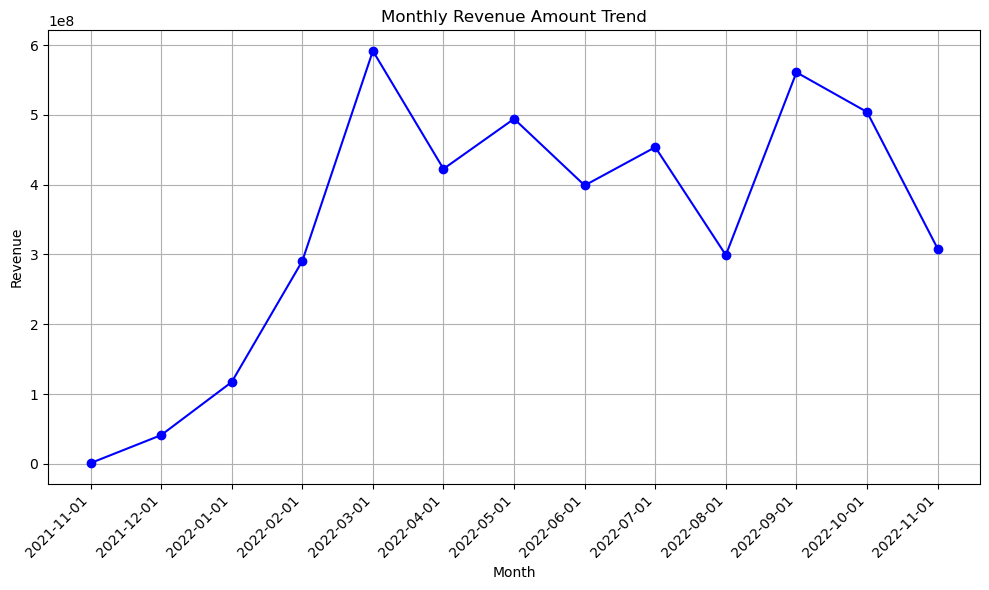

In [75]:
def pay_chart(df):
    plt.figure(figsize=(10, 6))
    plt.plot(df['paid_on_date'].astype(str), df['total_amount'], marker='o', linestyle='-', color='b')
    plt.title('Monthly Revenue Amount Trend')
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

pay_chart(month_df)

In [76]:
df.head()

,id,total_amount,amount_due,issue_date,due_date,paid_on_date,payer_id,issue_month,paid_month,paid_in,...,total_amount_paid_till_now,total_payments_made,due/total,write_off,dso,total_amount_lag_1,total_amount_lag_2,total_amount_lag_3,rolling_mean,rolling_std
0,1,1720329,0.0000,2021-11-01,2021-12-31,2022-08-22,pKey9MQ59wyF6GhjWM5p,11,8.0000,0.0000,...,1040978725,3621,0.0000,0,294.0000,0.0000,0.0000,0.0000,0.0000,0.0000
17,18,1721441,0.0000,2021-11-01,2021-12-31,2021-12-29,pKey9MQ59wyF6GhjWM5p,11,12.0000,58.0000,...,1040978725,3621,0.0000,0,58.0000,1720329.0000,0.0000,0.0000,0.0000,0.0000
16,17,1851297,0.0000,2021-11-01,2021-12-31,2022-02-21,pKey9MQ59wyF6GhjWM5p,11,2.0000,0.0000,...,1040978725,3621,0.0000,0,112.0000,1721441.0000,1720329.0000,0.0000,1764355.6667,75295.4562
15,16,1626618,0.0000,2021-11-01,2021-12-16,2022-01-18,cAZ1GfmspxNnk7myr0sJ,11,1.0000,0.0000,...,28804545,18,0.0000,0,78.0000,1851297.0000,1721441.0000,1720329.0000,1733118.6667,112793.7905
14,15,73114,0.0000,2021-11-01,2021-12-01,2022-01-15,6tYO4at7N5JO1d9w8S2t,11,1.0000,0.0000,...,67808656,37,0.0000,0,75.0000,1626618.0000,1851297.0000,1721441.0000,1183676.3333,968313.8362


In [77]:
df.columns

Index(['id', 'total_amount', 'amount_due', 'issue_date', 'due_date',
       'paid_on_date', 'payer_id', 'issue_month', 'paid_month', 'paid_in',
       'delay days', 'payer_category', 'reminders', 'avg_delay',
       'total_amount_paid_till_now', 'total_payments_made', 'due/total',
       'write_off', 'dso', 'total_amount_lag_1', 'total_amount_lag_2',
       'total_amount_lag_3', 'rolling_mean', 'rolling_std'],
      dtype='object')

# Trying LSTM, for getting total amount by month

Using LSTM

In [1645]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [1646]:
lstm.head()

,paid_on_date,total_amount,avg_delay_month,avg_total_payment_made_month
0,2021-11-01,1014946,32.0000,26.0000
1,2021-12-01,41098689,23.0000,82.0000
2,2022-01-01,117168634,20.0000,466.0000
3,2022-02-01,290557410,18.0000,397.0000
4,2022-03-01,591627032,32.0000,581.0000


In [1647]:
# month_df = monthly_revenue.reset_index(name='total_amount')

In [1648]:
lstm

,paid_on_date,total_amount,avg_delay_month,avg_total_payment_made_month
0,2021-11-01,1014946,32.0000,26.0000
1,2021-12-01,41098689,23.0000,82.0000
2,2022-01-01,117168634,20.0000,466.0000
3,2022-02-01,290557410,18.0000,397.0000
4,2022-03-01,591627032,32.0000,581.0000
5,2022-04-01,422633704,45.0000,633.0000
6,2022-05-01,494348434,53.0000,2006.0000
7,2022-06-01,398896986,52.0000,2069.0000
8,2022-07-01,453730952,46.0000,1152.0000
9,2022-08-01,299072569,43.0000,1114.0000


In [1649]:
data = lstm.filter(['total_amount'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .75 ))

training_data_len

10

In [1650]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

scaled_data

array([[0.        ],
       [0.06786814],
       [0.19666663],
       [0.49024135],
       [1.        ],
       [0.71386747],
       [0.83529189],
       [0.67367744],
       [0.76652005],
       [0.50465886],
       [0.94804556],
       [0.85184227],
       [0.52036157]])

In [1651]:
sequence_length = 6

x_train = []
y_train = []

for i in range(sequence_length, len(scaled_data)):
    x_train.append(scaled_data[i - sequence_length:i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print("x_train:")
print(x_train)
print("\ny_train:")
print(y_train)

x_train:
[[[0.        ]
  [0.06786814]
  [0.19666663]
  [0.49024135]
  [1.        ]
  [0.71386747]]

 [[0.06786814]
  [0.19666663]
  [0.49024135]
  [1.        ]
  [0.71386747]
  [0.83529189]]

 [[0.19666663]
  [0.49024135]
  [1.        ]
  [0.71386747]
  [0.83529189]
  [0.67367744]]

 [[0.49024135]
  [1.        ]
  [0.71386747]
  [0.83529189]
  [0.67367744]
  [0.76652005]]

 [[1.        ]
  [0.71386747]
  [0.83529189]
  [0.67367744]
  [0.76652005]
  [0.50465886]]

 [[0.71386747]
  [0.83529189]
  [0.67367744]
  [0.76652005]
  [0.50465886]
  [0.94804556]]

 [[0.83529189]
  [0.67367744]
  [0.76652005]
  [0.50465886]
  [0.94804556]
  [0.85184227]]]

y_train:
[0.83529189 0.67367744 0.76652005 0.50465886 0.94804556 0.85184227
 0.52036157]


In [1658]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=96, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 3s 3s/step - loss: 0.5749
Epoch 2/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.4730
Epoch 3/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.3814
Epoch 4/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.2979
Epoch 5/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.2219
Epoch 6/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1547
Epoch 7/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.0996
Epoch 8/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.0625
Epoch 9/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.0512
Epoch 10/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0689
Epoch 11/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.0970
Epoch 12/2000
1/1 [==============================] - 0s 15ms/step - loss: 0.1086
Epoch 13/2000
1/1 [====================

In [1659]:
test_data = scaled_data[training_data_len - 6: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(6, len(test_data)):
    x_test.append(test_data[i-6:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 1s/step


30001902.069107912

In [1660]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

In [1661]:
valid

,total_amount,Predictions
10,560942111,595731200.0000
11,504123284,526515936.0000
12,308346780,339789280.0000


In [1662]:
df_ls=df.copy()

In [1663]:
df_ls.head()

,id,total_amount,amount_due,issue_date,due_date,paid_on_date,payer_id,issue_month,paid_month,paid_in,...,total_amount_paid_till_now,total_payments_made,due/total,write_off,dso,total_amount_lag_1,total_amount_lag_2,total_amount_lag_3,rolling_mean,rolling_std
0,1,1720329,0.0000,2021-11-01,2021-12-31,2022-08-22,pKey9MQ59wyF6GhjWM5p,11,8.0000,0.0000,...,1040978725,3621,0.0000,0,294.0000,0.0000,0.0000,0.0000,0.0000,0.0000
17,18,1721441,0.0000,2021-11-01,2021-12-31,2021-12-29,pKey9MQ59wyF6GhjWM5p,11,12.0000,58.0000,...,1040978725,3621,0.0000,0,58.0000,1720329.0000,0.0000,0.0000,0.0000,0.0000
16,17,1851297,0.0000,2021-11-01,2021-12-31,2022-02-21,pKey9MQ59wyF6GhjWM5p,11,2.0000,0.0000,...,1040978725,3621,0.0000,0,112.0000,1721441.0000,1720329.0000,0.0000,1764355.6667,75295.4562
15,16,1626618,0.0000,2021-11-01,2021-12-16,2022-01-18,cAZ1GfmspxNnk7myr0sJ,11,1.0000,0.0000,...,28804545,18,0.0000,0,78.0000,1851297.0000,1721441.0000,1720329.0000,1733118.6667,112793.7905
14,15,73114,0.0000,2021-11-01,2021-12-01,2022-01-15,6tYO4at7N5JO1d9w8S2t,11,1.0000,0.0000,...,67808656,37,0.0000,0,75.0000,1626618.0000,1851297.0000,1721441.0000,1183676.3333,968313.8362


In [1665]:
data = df_ls.filter(['total_amount'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .75 ))

training_data_len

9829

In [1666]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

scaled_data

array([[0.12219102],
       [0.12227001],
       [0.13149353],
       ...,
       [0.00342331],
       [0.00252536],
       [0.00894303]])

In [1667]:
sequence_length = 60

x_train = []
y_train = []

for i in range(sequence_length, len(scaled_data)):
    x_train.append(scaled_data[i - sequence_length:i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print("x_train:")
print(x_train)
print("\ny_train:")
print(y_train)

x_train:
[[[0.12219102]
  [0.12227001]
  [0.13149353]
  ...
  [0.13221596]
  [0.1322301 ]
  [0.00766089]]

 [[0.12227001]
  [0.13149353]
  [0.11553484]
  ...
  [0.1322301 ]
  [0.00766089]
  [0.00837203]]

 [[0.13149353]
  [0.11553484]
  [0.00519122]
  ...
  [0.00766089]
  [0.00837203]
  [0.00922054]]

 ...

 [[0.00247337]
  [0.00826918]
  [0.05937459]
  ...
  [0.00271231]
  [0.00325412]
  [0.00326207]]

 [[0.00826918]
  [0.05937459]
  [0.00754483]
  ...
  [0.00325412]
  [0.00326207]
  [0.00342331]]

 [[0.05937459]
  [0.00754483]
  [0.0146328 ]
  ...
  [0.00326207]
  [0.00342331]
  [0.00252536]]]

y_train:
[0.00837203 0.00922054 0.00837203 ... 0.00342331 0.00252536 0.00894303]


In [1670]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
204/204 [==============================] - 49s 223ms/step - loss: 0.0022
Epoch 2/10
204/204 [==============================] - 44s 215ms/step - loss: 0.0022
Epoch 3/10
204/204 [==============================] - 44s 214ms/step - loss: 0.0021
Epoch 4/10
204/204 [==============================] - 45s 218ms/step - loss: 0.0021
Epoch 5/10
204/204 [==============================] - 46s 226ms/step - loss: 0.0021
Epoch 6/10
204/204 [==============================] - 45s 219ms/step - loss: 0.0021
Epoch 7/10
204/204 [==============================] - 45s 221ms/step - loss: 0.0021
Epoch 8/10
204/204 [==============================] - 45s 218ms/step - loss: 0.0021
Epoch 9/10
204/204 [==============================] - 46s 225ms/step - loss: 0.0021
Epoch 10/10
204/204 [==============================] - 47s 228ms/step - loss: 0.0021


In [1672]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

103/103 [==============================] - 6s 55ms/step


566265.2205351976

In [1673]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

In [1674]:
valid

,total_amount,Predictions
11119,178711,217508.8125
11120,231100,211554.0312
11124,1193808,212824.7344
11107,128484,335528.7812
11114,177549,254947.3438
...,...,...
17470,45842,100802.5234
17471,45954,101359.1172
17472,48224,101534.1719
17462,35582,101863.4766
